In [4]:
from keras import datasets, models, layers
from keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# CIFAR-10
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images.shape, test_images.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [3]:
train_images[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [4]:
# Normalization
train_images, test_images = train_images / 255.0, test_images / 255.0

In [8]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

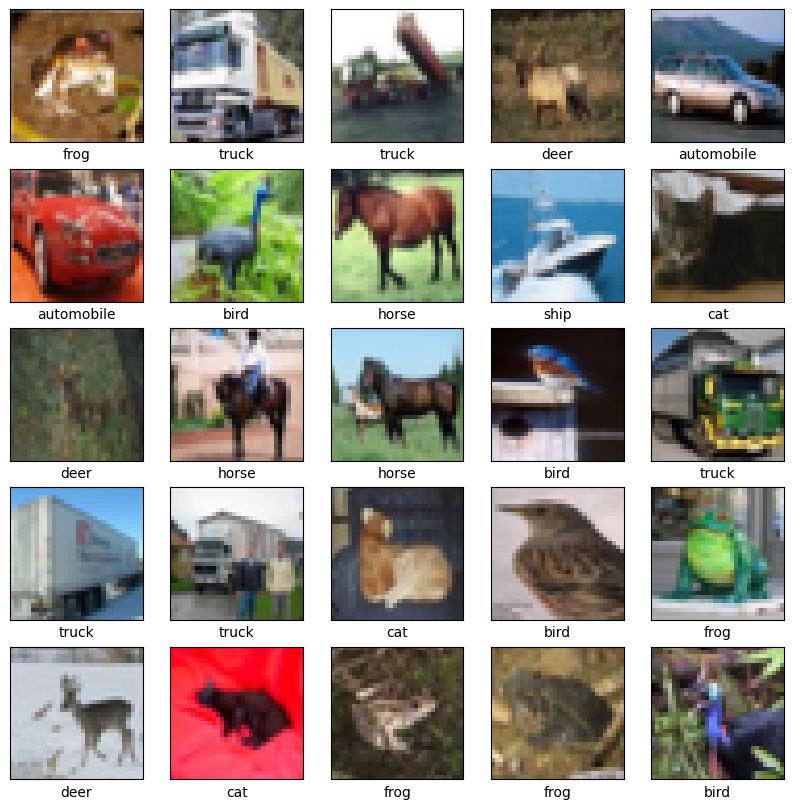

In [6]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])\

    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [7]:
input_dim = train_images[0].shape
input_dim

(32, 32, 3)

In [8]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
test_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

## CNN Model

In [9]:
from keras.applications import VGG16
from keras import models, layers, datasets

In [10]:
# Loading Pre-trained VGG-16 Model
base_model = VGG16(weights='imagenet',
                   include_top=False,
                   input_shape=input_dim)

In [11]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [12]:
x=base_model.output
x=layers.Flatten()(x)
x=layers.Dense(84, activation='relu')(x)
x=layers.Dropout(0.4)(x)

prediction=layers.Dense(10, activation='softmax')(x)

model = models.Model(inputs=base_model.input, outputs=prediction)

In [13]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [14]:
for layer in base_model.layers:
    layer.trainable = False

In [15]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [16]:
# Compile
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
# Callbacks

# EarlyStopping
es = EarlyStopping(monitor='val_loss',
                   mode='min',
                   patience=3,
                   verbose=1)

# Model Checkpoint
mc = ModelCheckpoint(filepath='best_model.keras',
                     monitor='val_accuracy',
                     mode='max',
                     verbose=1,
                     save_best_only=True)


In [18]:
# Training
history = model.fit(train_images,
                    train_labels,
                    epochs=5,
                    batch_size=256,
                    validation_split=0.2,
                    verbose=1,
                    callbacks=[es, mc])

Epoch 1/5


157/157 [==============================] - ETA: 0s - loss: 1.8198 - accuracy: 0.3559
Epoch 1: val_accuracy improved from -inf to 0.49970, saving model to best_model.keras
157/157 [==============================] - 85s 538ms/step - loss: 1.8198 - accuracy: 0.3559 - val_loss: 1.4623 - val_accuracy: 0.4997
Epoch 2/5
157/157 [==============================] - ETA: 0s - loss: 1.4938 - accuracy: 0.4782
Epoch 2: val_accuracy improved from 0.49970 to 0.53790, saving model to best_model.keras
157/157 [==============================] - 98s 625ms/step - loss: 1.4938 - accuracy: 0.4782 - val_loss: 1.3357 - val_accuracy: 0.5379
Epoch 3/5
157/157 [==============================] - ETA: 0s - loss: 1.3967 - accuracy: 0.5146
Epoch 3: val_accuracy improved from 0.53790 to 0.56040, saving model to best_model.keras
157/157 [==============================] - 94s 598ms/step - loss: 1.3967 - accuracy: 0.5146 - val_loss: 1.2785 - val_accuracy: 0.5604
Epoch 4/5
157/157 [============================

In [19]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)

313/313 - 25s - loss: 1.2423 - accuracy: 0.5639 - 25s/epoch - 81ms/step
0.5638999938964844


In [20]:
best_model = models.load_model('best_model.keras')
test_loss, test_acc = best_model.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)

313/313 - 22s - loss: 1.2423 - accuracy: 0.5639 - 22s/epoch - 70ms/step
0.5638999938964844


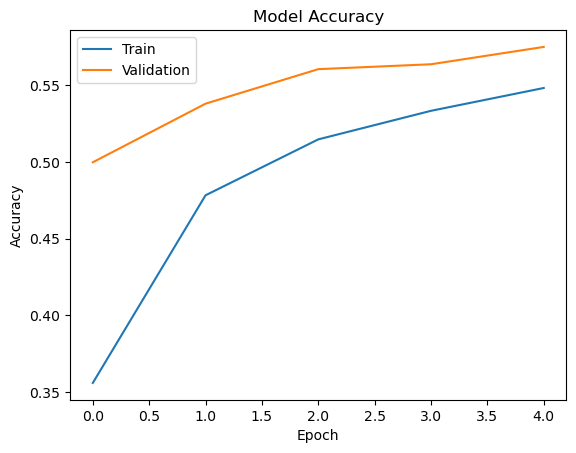

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

## GoogleNet - InceptionV3 Model

In [2]:
from keras import datasets, models, layers
from keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf

# Load and reshape dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Resize to 75x75
train_images = tf.image.resize(train_images, [75, 75])
test_images = tf.image.resize(test_images, [75, 75])

train_images.shape, test_images.shape

(TensorShape([50000, 75, 75, 3]), TensorShape([10000, 75, 75, 3]))

In [3]:
# Normalization
train_images, test_images = train_images / 255.0, test_images / 255.0

In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

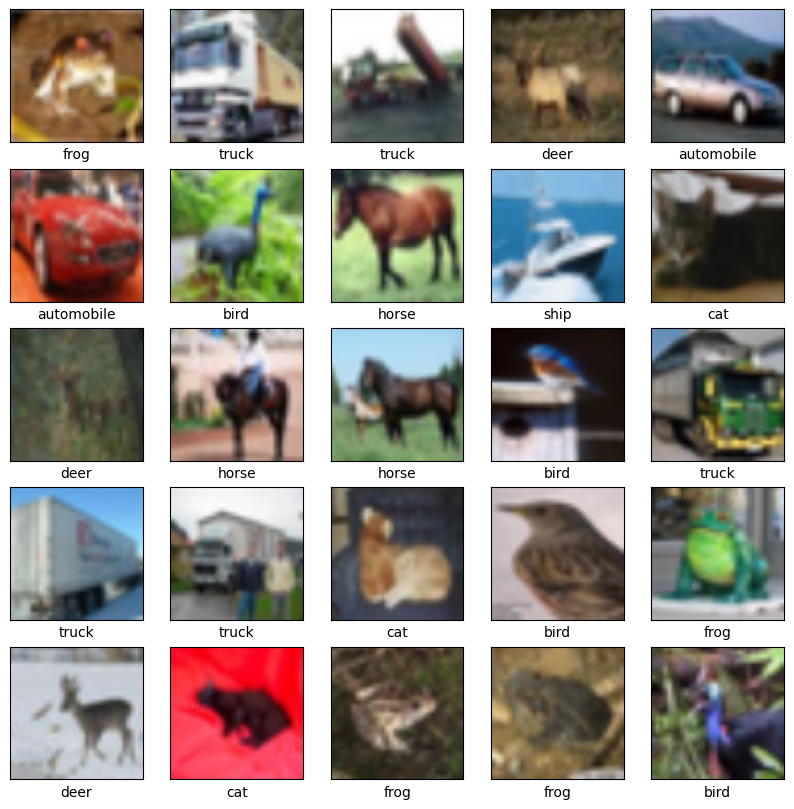

In [5]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])\

    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [6]:
input_dim = train_images[0].shape
input_dim

TensorShape([75, 75, 3])

In [7]:
from tensorflow.keras.applications import InceptionV3

# Loading Pre-trained InceptionV3 Model
base_model = InceptionV3(weights='imagenet',
                           include_top=False,
                           input_shape=input_dim)

In [8]:
base_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 75, 75, 3)]          0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 37, 37, 32)           864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 37, 37, 32)           96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 37, 37, 32)           0         ['batch_normalizati

In [16]:
x=base_model.output
x=layers.Flatten()(x)
x=layers.Dense(84, activation='relu')(x)
x=layers.Dropout(0.4)(x)

prediction=layers.Dense(10, activation='softmax')(x)

model = models.Model(inputs=base_model.input, outputs=prediction)

In [17]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 75, 75, 3)]          0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 37, 37, 32)           864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 37, 37, 32)           96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 37, 37, 32)           0         ['batch_normalization[0]

In [18]:
for layer in base_model.layers:
    layer.trainable = False

In [19]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 75, 75, 3)]          0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 37, 37, 32)           864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 37, 37, 32)           96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 37, 37, 32)           0         ['batch_normalization[0]

In [20]:
# Compile
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [22]:
# Callbacks

# EarlyStopping
es = EarlyStopping(monitor='val_loss',
                   mode='min',
                   patience=3,
                   verbose=1)

In [23]:
# Training
N = 10000
history = model.fit(train_images[:N],
                    train_labels[:N],
                    epochs=5,
                    batch_size=256,
                    validation_split=0.2,
                    verbose=1,
                    callbacks=[es])

Epoch 1/5



C:\Users\elsm5\anaconda3\Lib\site-packages\tensorflow\python\util\dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)



4/4 [==============================] - 7s 748ms/step - loss: 0.0000e+00 - accuracy: 0.1112 - val_loss: 0.0000e+00 - val_accuracy: 0.1150
Epoch 2/5
4/4 [==============================] - 1s 243ms/step - loss: 0.0000e+00 - accuracy: 0.1112 - val_loss: 0.0000e+00 - val_accuracy: 0.1150
Epoch 3/5
4/4 [==============================] - 1s 225ms/step - loss: 0.0000e+00 - accuracy: 0.1112 - val_loss: 0.0000e+00 - val_accuracy: 0.1150
Epoch 4/5
4/4 [==============================] - 1s 225ms/step - loss: 0.0000e+00 - accuracy: 0.1112 - val_loss: 0.0000e+00 - val_accuracy: 0.1150
Epoch 4: early stopping


In [24]:
test_loss, test_acc = model.evaluate(test_images[:N],  test_labels[:N], verbose=2)
print(test_acc)

32/32 - 1s - loss: 0.0000e+00 - accuracy: 0.0890 - 1s/epoch - 42ms/step
0.08900000154972076


In [ ]:
best_model = models.load_model('best_model.keras')
test_loss, test_acc = best_model.evaluate(test_images[:N],  test_labels[:N], verbose=2)
print(test_acc)

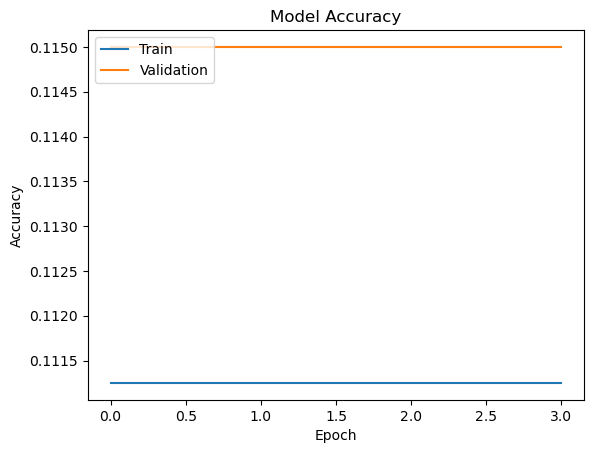

In [25]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')